## MNIST Original Hand-written Images

In [3]:
import joblib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [57]:
train=pd.read_csv('../static/data/mnist/train.csv', header=0, index_col=None)
train.shape
#캐글어디서.. #Train(42000, 785)레이블주고, test28,000건 레이블y값을안줌;;;;
#   그래서 train으로 다하셨다고... 
#  [Keras에서는 Train60,000건, Test10,000건]

(42000, 785)

In [58]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
train.iloc[:, 1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    train.iloc[:, 1:], train.label, stratify=train.label, test_size=0.25, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#((31500, 784), (10500, 784), (31500,), (10500,))

((31500, 784), (10500, 784), (31500,), (10500,))

In [61]:
df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_test['target'] = y_test
df_test.to_csv('../static/data/mnist/mnist_test.csv', index=False)
#train데이터는 쓸모가없다;별도훈련할것이 아니라, 여기에있는걸로 훈련시켜서 모델만 save할꺼기 때문에

In [62]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,target
30933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
39199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
23092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
25898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
41775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
41966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [63]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [65]:
X_train_scaled = scaler.transform(X_train)

In [66]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X_test = X_test.iloc[:,:-1]

In [74]:
X_test_scaled = scaler.transform(X_test)

In [76]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape
#((31500, 784), (10500, 784))

((31500, 784), (10500, 784))

In [77]:
joblib.dump(scaler, '../static/model/mnist_scaler.pkl')

['../static/model/mnist_scaler.pkl']

In [11]:
#분류기: 로지스틱리그리션, 서포트벡터클레시파이어, 랜덤포레스트(디시전트리를기반으로한 앙상블) 있는데 시간관계상 svc만
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [13]:
params = {
    #'C': [0.1, 1, 10]
    'C': [5, 10, 20]
}

In [14]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5, 
                       verbose=1, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)
#시간걸림 교수님은13분정도소요됐다하심. 13:09~ 대략20분
#최고 평균 정확도: 0.9789
#최적 파라미터: {'C': 10}

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 15.8min finished
최고 평균 정확도: 0.9789
최적 파라미터: {'C': 10}


In [15]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test_scaled)
accuracy_score(y_test, pred)
#시간소요 13:58-
#0.9767619047619047

0.9767619047619047

In [16]:
joblib.dump(best_sv, '../static/model/mnist_sv.pkl') #훈련한모델 저장

['../static/model/mnist_sv.pkl']

### 다른분류기도만들어보자 ><

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()

In [80]:
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(
    estimators=[('LR', lr), ('SVC', svc), ('KNN', knn)], voting='hard'
)
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f'앙상블 학습의 정확도: {acc:.4f}')
#시간걸림 23:58- 대략30분미만
#앙상블정확도 0.9669

앙상블 학습의 정확도: 0.9669


In [82]:
joblib.dump(vo_clf, '../static/model/mnist_voting.pkl')

['../static/model/mnist_voting.pkl']

In [81]:
classifiers = [lr,svc,knn]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, pred)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도: {acc:.4f}')
    #12:24- 15분소요
#LogisticRegression 정확도: 0.9129
#SVC 정확도: 0.9725
#KNeighborsClassifier 정확도: 0.9642

LogisticRegression 정확도: 0.9129
SVC 정확도: 0.9725
KNeighborsClassifier 정확도: 0.9642


In [83]:
#svc는 교수님이하셨고 다음 정확도 높은게 knn
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [84]:
#주의!!!!!!!! 파라미터수정할것!!!!!! 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
Knn_clf = KNeighborsClassifier(n_jobs=1)
param_distribs = { 'n_neighbors': randint(low=1, high=50), 'leaf_size': randint(low=1, high=50), 'p': randint(low=1, high=50)}
random_cv = RandomizedSearchCV(Knn_clf, param_distributions=param_distribs, n_iter=100, cv=5, n_jobs=1,scoring='accuracy', refit=True)
random_cv.fit(X_train,y_train)
print(f'최고 평균 정확도: {random_cv.best_score_:.4f}')
print('최적 파라미터: ', random_cv.best_params_)
#시간 00:45-13:45까지도진행중이라니ㅠㅠ... 1~10까지만할껄 ㅠㅠㅠ 결국멈춤
#파라미터갯수50*50*50*CV5=625,000이건너무..
#10*10*10*CV5해도 5000fit (27fit 14분소요됐었으니까)2,790분예상(46시간??노노해)

In [1]:
best = random_cv.best_estimator_
pred = best.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'최적 파라미터 Kneighbor 정확도: {acc:.4f}')

NameError: name 'random_cv' is not defined

In [ ]:
joblib.dump(best, '../static/model/mnist_knn.pkl')

# Test

In [5]:
scaler = joblib.load('../static/model/mnist_scaler.pkl')
best_sv = joblib.load('../static/model/mnist_sv.pkl')

In [42]:
index = 900
test_data = X_test.iloc[index:index+3, :].values#인덱스로부터3개의 값을가져와서 화면에보여주려고
test_data.shape #(3, 785)

(3, 785)

In [43]:
test_scaled = scaler.transform(test_data)

ValueError: operands could not be broadcast together with shapes (3,785) (784,) (3,785) 

In [15]:
label_list = y_test[index:index+3] #위의 데이터에 대한 정답label
label_list

38939    7
784      6
34506    3
Name: label, dtype: int64

In [16]:
pred_sv = best_sv.predict(test_scaled)
pred_sv

array([7, 6, 3], dtype=int64)

- 시각화하기

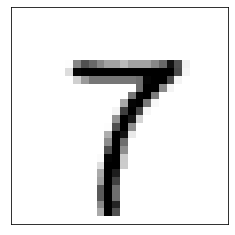

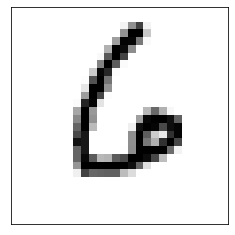

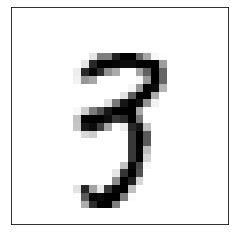

In [22]:
for i in range(3):
    digit = test_data[i].reshape(28,28) #1차원인 test_data를 2차원으로 .reshape(28,28)
    plt.figure(figsize=(4,4))
    plt.xticks([]); plt.yticks([])
    plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')

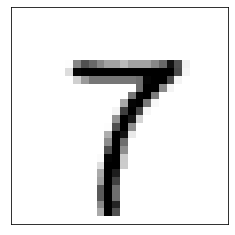

In [23]:
#하나만그리는코드
plt.figure(figsize=(4,4))
plt.xticks([]); plt.yticks([])
plt.imshow(test_data[0].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
plt.show()

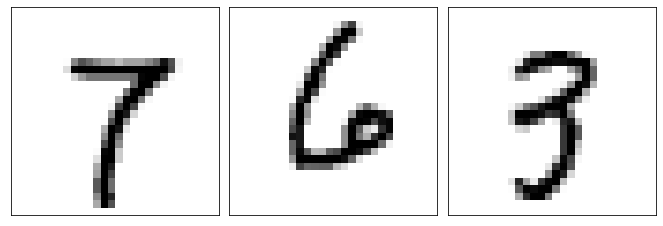

In [24]:
#여러개그리는코드
fig = plt.figure(figsize=(12, 4))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(3):
    ax = fig.add_subplot(1, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(test_data[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')